# Week 7 - Lab 7-01 

In this lab we will analyze if there is a is any relation between the windspeed and the month in knock (data available [here](https://cli.fusio.net/cli/climate_data/webdata/mly4935.csv))

## Section 1 - Importing Modules and Dataset

In [8]:
# import modules and read in the data 
# need to skil the first few lines of metadata

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/mly4935.csv", skiprows=19) 
print(df.head)


<bound method NDFrame.head of      year  month  meant maxtp mintp  mnmax  mnmin   rain  gmin wdsp maxgt  \
0    1996      8   13.4  20.4   7.3   16.6   10.3  109.4   5.3  8.3    34   
1    1996     10    9.7               12.5    7.0                           
2    1996     11    5.0                7.6    2.5                           
3    1996     12    3.1  10.7  -4.0    5.2    1.1         -5.3  9.4    48   
4    1997      1    3.4  10.7  -3.9    5.2    1.6   26.0  -5.2  8.0    40   
..    ...    ...    ...   ...   ...    ...    ...    ...   ...  ...   ...   
333  2024      6   11.6  21.8   4.0   15.2    8.0   66.2   1.4  9.0    35   
334  2024      7   13.4  20.3   6.8   16.6   10.2   97.3   5.3  7.7    34   
335  2024      8   13.3  21.5   6.0   16.7   10.0  215.4   4.8  9.5    40   
336  2024      9   12.0  23.6   4.9   15.3    8.7   56.1   1.4  8.3    37   
337  2024     10   10.1  16.5   2.6   12.9    7.3  116.1  -0.5  8.5    65   

      sun  
0          
1          
2        

Is there any correlation between the mean temperature and the month

In [ ]:
corrtemp = df["month"].corr(df["meant"]) 
print(corrtemp)

# low correlation. Seasonality not taken into account

0.2610020102262302


The wind data (`wdsp`) needs to be tidied up as there are some data points missing. These can be dropped, but firstly a new dataframe needs to be generated using `month` and `wdsp`

## Section 2 - Tidying Dataset

In [19]:
clean_df = df[['month', 'wdsp']].copy()

# dropping the NA vaues by first replacing cells with whitespace with NaN values
# then dropping them. In this case only 2 values, or less than 1% of wdsp
# values are missing so imputation would not be of benefit

percent_missing = (clean_df['wdsp'].str.startswith(' ').sum() / clean_df.shape[0])*100
print(percent_missing )

0.591715976331361


In [20]:
clean_df['wdsp']= clean_df.loc[:,('wdsp')].replace(' ', np.nan) 
clean_df.dropna(inplace=True)

In [23]:
# converting wdsd to float
clean_df['wdsp'] = clean_df['wdsp'].astype(float)

## Section 3 - Analysis

In [28]:
# is there a correlation between month and wdsp
corrwind = clean_df['month'].corr(clean_df['wdsp'])
print (f'wind correlation {corrwind}')
# correlation is now negative 

wind correlation -0.19999237419389984


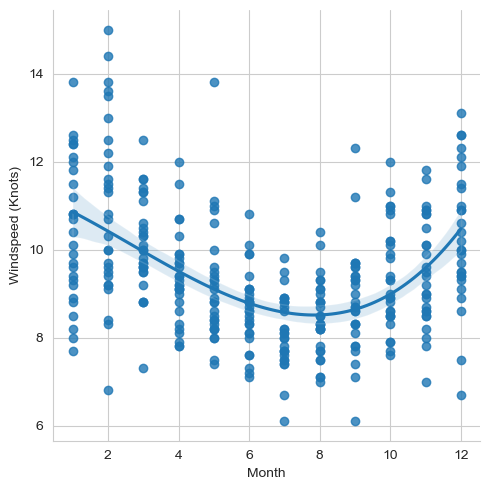

In [ ]:
# plotting it out using lmplot of seaborn
sns.set_style('whitegrid')
sns.lmplot(x='month', y='wdsp', order=3, data=clean_df)
plt.xlabel('Month')
plt.ylabel('Windspeed (Knots)');

# Windspeed is higher in the winter where it is more stormy and lower in the summer momths, i.e. windspeed has seasonality